In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
# Read data
train_features = pd.read_csv('Данные/training_features.csv')
test_features = pd.read_csv('Данные/testing_features.csv')
train_labels = pd.read_csv('Данные/training_labels.csv')
test_labels = pd.read_csv('Данные/testing_labels.csv')


In [3]:
train_features.head(12)

,G,Num_obs,rms,U,M,Peri,Node,i,e,n,a,Tp,Perihelion_dist,Synodic_period,Orbit_type_Apollo,Orbit_type_Atira,Orbit_type_Object with perihelion distance < 1.665 AU
0,0.15,149,0.75,0.0,308.24208,335.86362,151.46848,14.11468,0.301696,0.562883,1.452749,2.459979e+06,1.014460,2.331560,0,0,0
1,0.15,65,0.70,6.0,128.40160,16.63601,57.30909,3.01661,0.192127,0.697810,1.258862,2.459703e+06,1.017000,3.424652,0,0,0
2,0.15,23,0.39,9.0,217.81186,166.96738,23.52497,16.75494,0.459920,0.376795,1.898450,2.460265e+06,1.025316,1.618902,0,0,0
3,0.15,28,0.49,5.0,219.25379,234.34710,260.87909,11.66789,0.308598,1.159491,0.897342,2.460009e+06,0.620424,5.668220,0,0,0
4,0.15,18,0.23,7.0,20.53976,359.46273,60.00803,30.51371,0.566963,0.254740,2.464550,2.459807e+06,1.067242,1.348545,0,0,0
5,0.15,167,0.56,0.0,232.31746,311.18401,343.72366,30.33385,0.329244,0.572600,1.436266,2.460110e+06,0.963385,2.386416,1,0,0
6,0.15,128,0.67,0.0,68.01153,69.21036,91.36575,2.95044,0.470406,1.254821,0.851298,2.459833e+06,0.450842,3.661074,0,0,0
7,0.15,39,0.33,5.0,218.45011,96.72260,150.06657,15.21420,0.454558,0.586919,1.412810,2.460129e+06,0.770607,2.472124,1,0,0
8,0.15,68,0.54,4.0,274.91727,335.68824,124.30915,1.13227,0.647696,0.252462,2.479353,2.460225e+06,0.873485,1.344355,1,0,0
9,0.15,41,0.81,3.0,90.35251,237.63557,211.66191,14.18348,0.472882,0.315369,2.137585,2.459601e+06,1.126760,1.470533,0,0,0


In [4]:
#print('Missing values in training features: ', np.sum(np.isnan(train_features)))
#print('Missing values in testing features:  ', np.sum(np.isnan(test_features)))
# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Train on the training features
imputer.fit(train_features)

# Transform both training data and testing data
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [5]:
# Make sure all values are finite
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [6]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)


In [7]:
# Convert y to one-dimensional array (vector)
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

In [8]:
# Function to calculate mean absolute percentage error
def mape(y_true, y_pred):
    return np.mean(abs(y_true - y_pred)/abs(y_true))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mape = mape(y_test, model_pred)
    
    # Return the performance metric
    return model_mape


In [9]:
lr = LinearRegression()
lr_mape = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAPE = %0.4f' % lr_mape)

Linear Regression Performance on the test set: MAPE = 0.0562


In [10]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mape = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAPE = %0.4f' % svm_mape)


Support Vector Machine Regression Performance on the test set: MAPE = 0.0477


In [11]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mape = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAPE = %0.4f' % random_forest_mape)

Random Forest Regression Performance on the test set: MAPE = 0.0452


In [12]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mape = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAPE = %0.4f' % gradient_boosted_mape)

Gradient Boosted Regression Performance on the test set: MAPE = 0.0459


In [13]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mape = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAPE = %0.4f' % knn_mape)

K-Nearest Neighbors Regression Performance on the test set: MAPE = 0.0589


Text(0.5, 1.0, 'Model Comparison on Test MAPE')

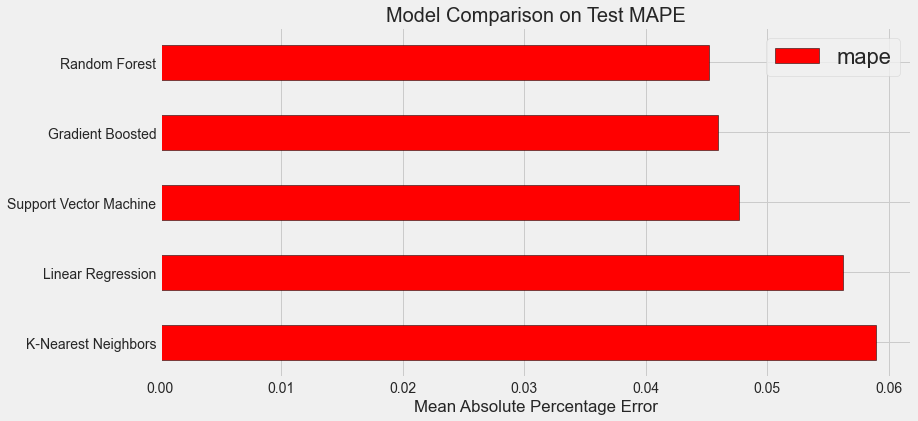

In [14]:
plt.style.use('fivethirtyeight')
figsize(12, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mape': [lr_mape, svm_mape, random_forest_mape, 
                                         gradient_boosted_mape, knn_mape]})

# Horizontal bar chart of test mape
model_comparison.sort_values('mape', ascending = False).plot(x = 'model', y = 'mape', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Percentage Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAPE', size = 20)


In [15]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}


In [16]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 5-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [17]:
# Fit on the training data
random_cv.fit(X, y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'loss': ['ls', 'lad', 'huber'],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

In [18]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
3,126.210071,8.421384,0.153799,0.061717,500,6,8,None,5,huber,"{'n_estimators': 500, 'min_samples_split': 6, ...",-0.948951,-0.995810,-0.971544,-1.011705,-0.970343,-0.979671,0.021833,1,-0.716890,-0.708540,-0.716660,-0.704843,-0.715710,-0.712529,0.004923
21,17.551578,0.372083,0.039800,0.002228,500,6,4,log2,5,huber,"{'n_estimators': 500, 'min_samples_split': 6, ...",-0.970368,-1.012095,-0.974621,-1.019394,-0.978364,-0.990968,0.020517,2,-0.748608,-0.736788,-0.735645,-0.730023,-0.731534,-0.736520,0.006543
10,429.879560,27.122899,0.543600,0.267081,1100,10,6,None,10,huber,"{'n_estimators': 1100, 'min_samples_split': 10...",-0.970254,-1.020921,-0.981994,-1.017782,-0.969824,-0.992155,0.022653,3,-0.089320,-0.083569,-0.092179,-0.083553,-0.089356,-0.087595,0.003454
20,87.980498,23.818314,0.341999,0.129788,500,6,1,sqrt,10,huber,"{'n_estimators': 500, 'min_samples_split': 6, ...",-0.975860,-1.011846,-0.989164,-1.016767,-0.985276,-0.995782,0.015808,4,-0.102819,-0.096990,-0.107527,-0.100881,-0.102391,-0.102122,0.003396
12,127.421638,65.012815,0.095400,0.081723,500,6,6,None,5,lad,"{'n_estimators': 500, 'min_samples_split': 6, ...",-0.962963,-1.024595,-0.985953,-1.026021,-0.982439,-0.996394,0.024878,5,-0.837233,-0.828424,-0.839904,-0.836647,-0.826481,-0.833738,0.005284
8,227.530028,6.461357,0.297000,0.021420,1500,6,2,sqrt,10,huber,"{'n_estimators': 1500, 'min_samples_split': 6,...",-0.969157,-1.021557,-0.991122,-1.028787,-0.978801,-0.997885,0.023454,6,-0.035563,-0.027655,-0.033068,-0.031631,-0.035384,-0.032660,0.002903
1,10.965185,0.122858,0.024800,0.003059,100,6,8,sqrt,10,huber,"{'n_estimators': 100, 'min_samples_split': 6, ...",-0.957862,-1.029395,-0.996242,-1.033251,-0.987952,-1.000940,0.027929,7,-0.558064,-0.570613,-0.575058,-0.575207,-0.576307,-0.571050,0.006779
11,128.074239,11.622807,0.737598,0.294624,1500,2,4,log2,10,lad,"{'n_estimators': 1500, 'min_samples_split': 2,...",-0.979249,-1.020058,-0.992545,-1.036452,-0.992376,-1.004136,0.020928,8,-0.499695,-0.490319,-0.498732,-0.484546,-0.489250,-0.492509,0.005817
2,333.762724,6.044050,0.374399,0.042448,500,4,2,auto,10,huber,"{'n_estimators': 500, 'min_samples_split': 4, ...",-0.976929,-1.024936,-1.002659,-1.034958,-0.981984,-1.004293,0.022872,9,-0.169382,-0.128853,-0.135372,-0.154729,-0.164830,-0.150633,0.015982
5,90.463703,20.340236,0.251400,0.103874,900,6,8,log2,5,lad,"{'n_estimators': 900, 'min_samples_split': 6, ...",-0.977533,-1.029705,-0.993612,-1.036358,-0.996363,-1.006714,0.022529,10,-0.827451,-0.802537,-0.804031,-0.808129,-0.820953,-0.812620,0.009849


In [19]:
random_cv.best_estimator_

GradientBoostingRegressor(loss='huber', max_depth=5, min_samples_leaf=8,
                          min_samples_split=6, n_estimators=500,
                          random_state=42)

In [20]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss = 'huber', max_depth = 5,
                                  min_samples_leaf = 8,
                                  min_samples_split = 6,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 5, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [21]:
# Fit the grid search
grid_search.fit(X, y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(loss='huber', max_depth=5,
                                                 min_samples_leaf=8,
                                                 min_samples_split=6,
                                                 random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600, 650, 700, 750,
                                          800]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

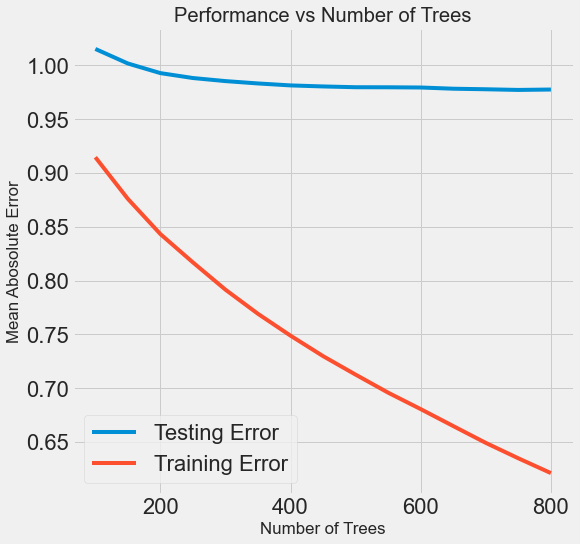

In [22]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend()
plt.title('Performance vs Number of Trees')

In [23]:
# Default model
default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model


GradientBoostingRegressor(loss='huber', max_depth=5, min_samples_leaf=8,
                          min_samples_split=6, n_estimators=750,
                          random_state=42)

In [24]:
%%timeit -n 1 -r 5
default_model.fit(X, y)


5.18 s ± 498 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [25]:
%%timeit -n 1 -r 5
final_model.fit(X, y)

1min 24s ± 15 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [26]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: MAPE = %0.4f.' % mape(y_test, default_pred))
print('Final model performance on the test set:   MAPE = %0.4f.' % mape(y_test, final_pred))

Default model performance on the test set: MAPE = 0.0459.
Final model performance on the test set:   MAPE = 0.0416.
